In [13]:
from PIL import Image
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/celebA/attr.csv')

In [14]:
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [15]:
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [90]:
cols = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']

In [127]:
def get_dif(attr, num):
    def show_img(attr, val, num = 10):
        def get_list(attr, val):
            return list(df[df[attr]==val].image_id)
        img_ids = get_list(attr, val)
        img_dir = 'dataset/celebA/img/img_align_celeba/'
        fig, axs = plt.subplots(1,num, figsize=(21,2))
        plt.suptitle(f'{attr} = {val}')
        for i in range(num):
            p = img_dir + str(img_ids[i])
            img=Image.open(p)
            axs[i].imshow(img)
            axs[i].set_xticks([])
            axs[i].set_yticks([])
        return
    show_img(attr, 1, num)
    show_img(attr, -1, num)

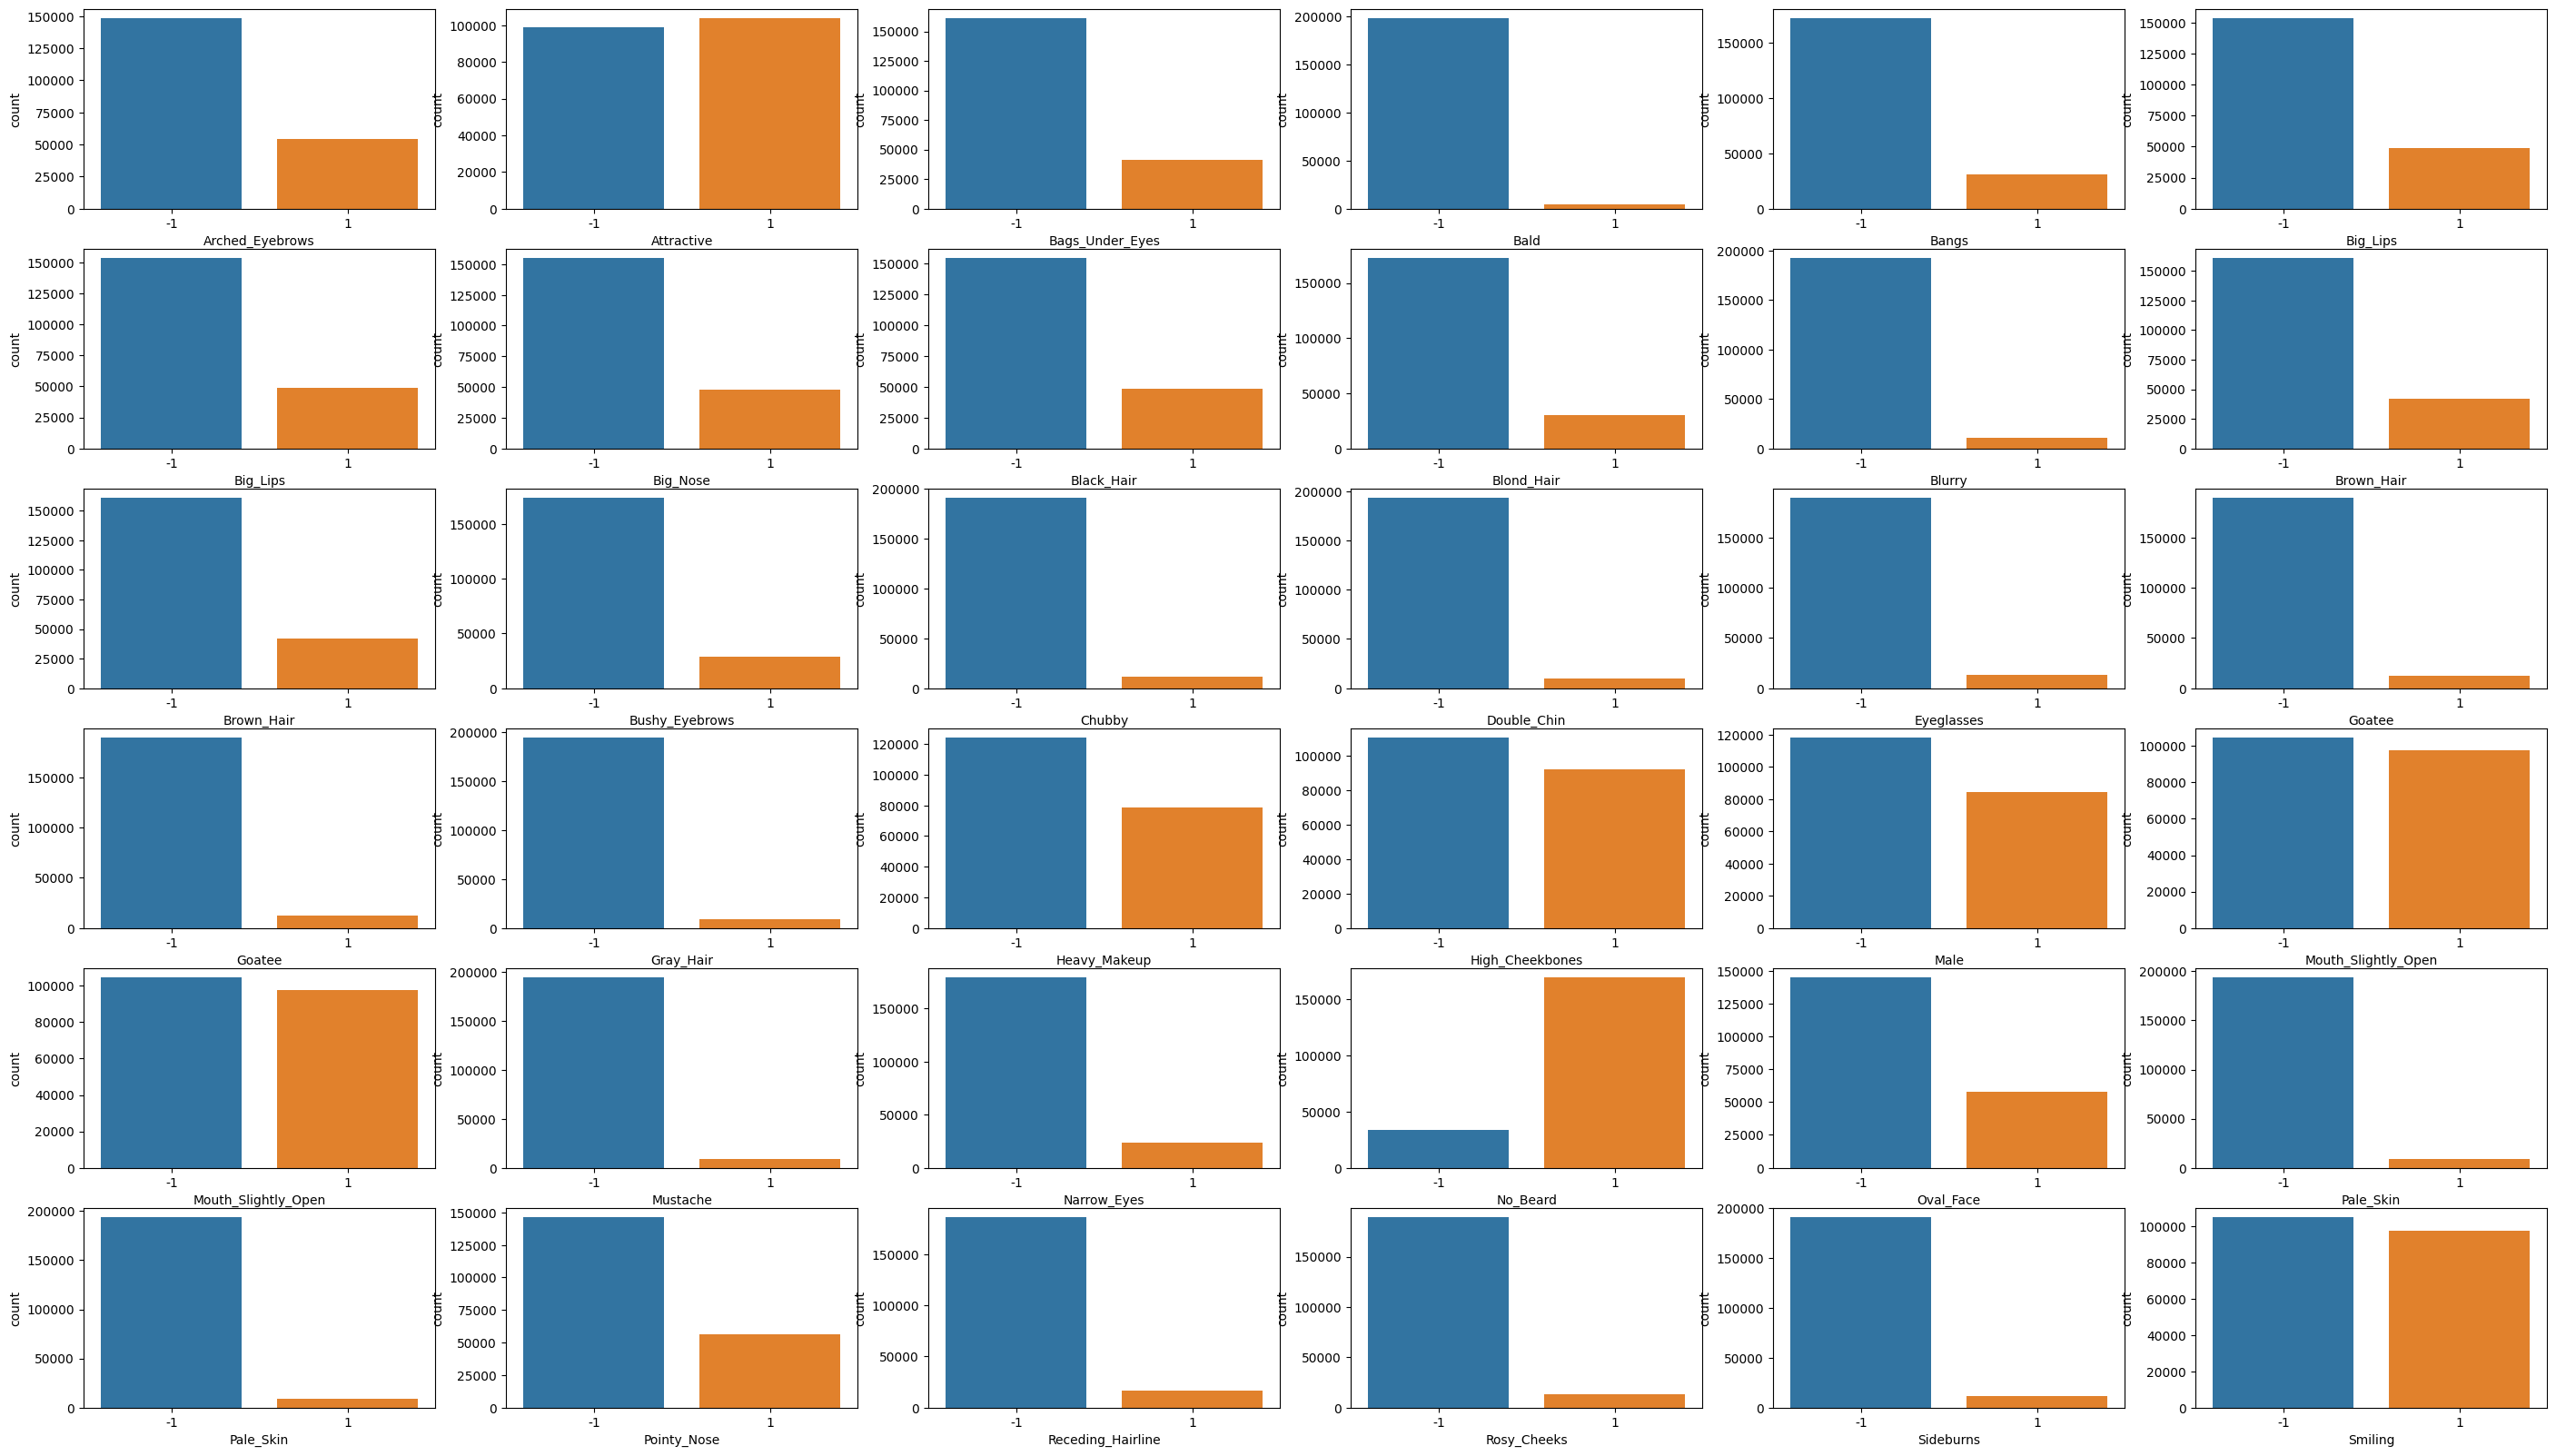

In [118]:
columns = [i for i in list(df.columns) if i not in ['image_id','5_o_Clock_Shadow']]
r,c = 6, 6
_, axs = plt.subplots(r,c, figsize=(35,20))
for i in range(r):
    for j in range(c):
        sns.countplot(data=df, x=columns[i*5 + j], ax=axs[i][j])
plt.show()

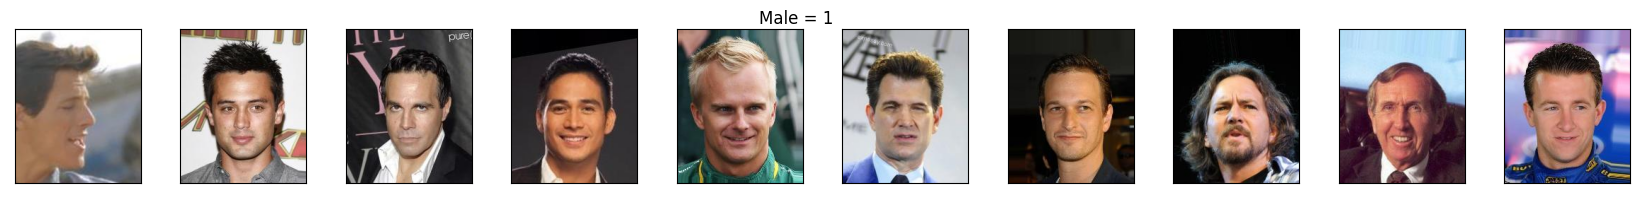

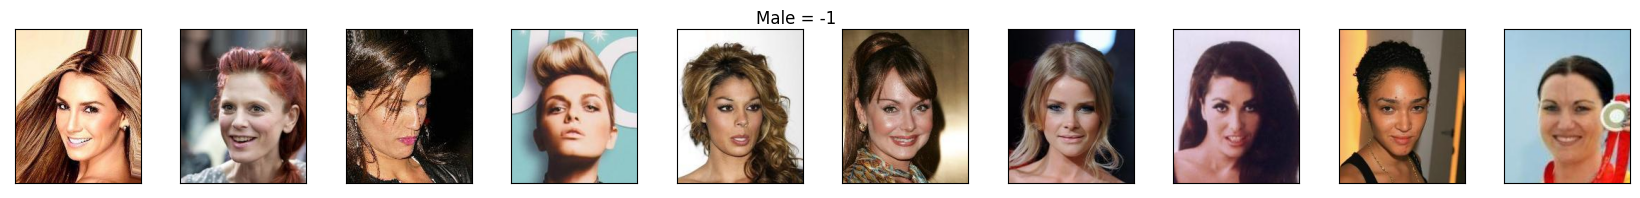

In [122]:
get_dif('Male')

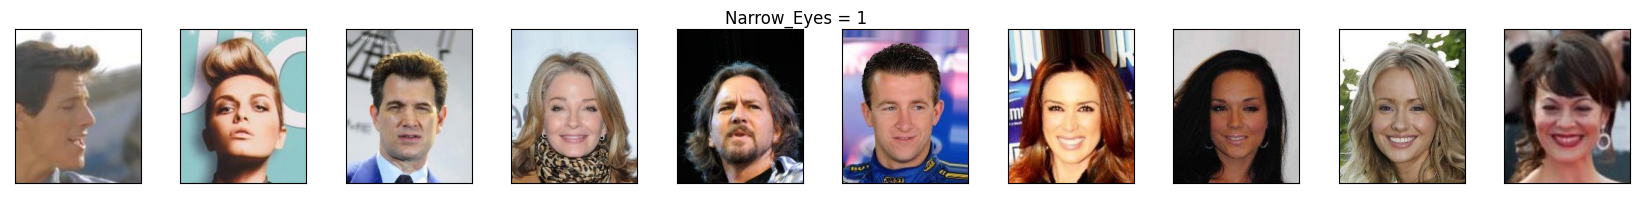

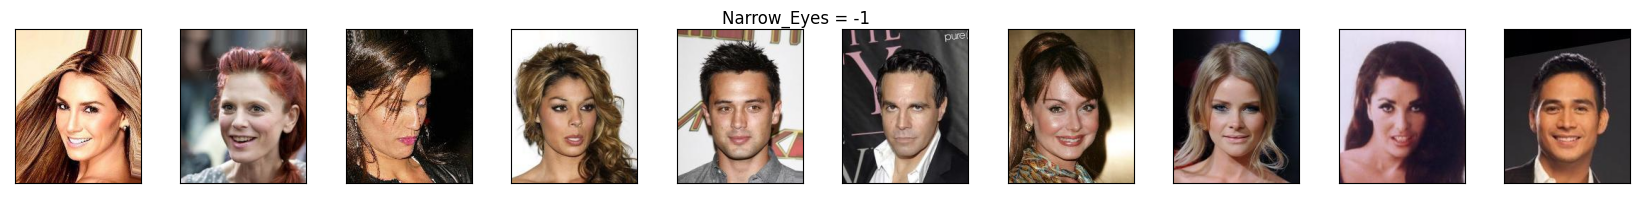

In [124]:
get_dif('Narrow_Eyes')

In [125]:
# Bald
# Bangs
# Double Chin
# Chubby 
# Mustache
# Pale Skin
# Eyeglass
# Goatee

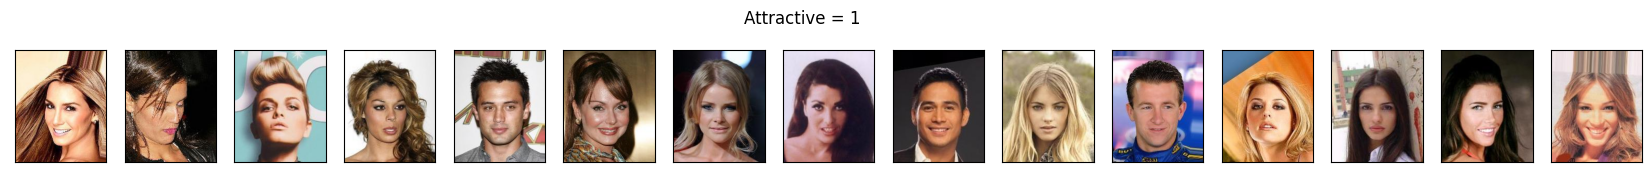

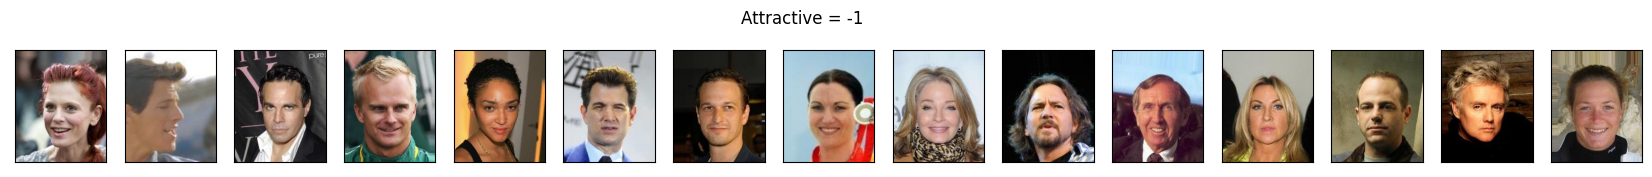

In [128]:
get_dif('Attractive', num = 15)

In [149]:
def num(attr):
    print(f'{attr} : ', len(df[df[attr]==1]))
    print('\n')
    print(f"Attractive & {attr} : ", len(df[(df['Attractive'] ==1)&(df[attr] ==1)]))
    print(f"Un-Attractive & {attr} : ", len(df[(df['Attractive'] ==-1)&(df[attr] ==1)]))
    print('\n')
    print(f"Attractive & non-{attr} : ", len(df[(df['Attractive'] ==1)&(df[attr] ==-1)]))
    print(f"Un-Attractive & non-{attr} : ", len(df[(df['Attractive'] ==-1)&(df[attr] ==-1)]))

In [150]:
num('Bald')

Bald :  4547


Attractive & Bald :  143
Un-Attractive & Bald :  4404


Attractive & non-Bald :  103690
Un-Attractive & non-Bald :  94362


In [151]:
num('Chubby')

Chubby :  11663


Attractive & Chubby :  390
Un-Attractive & Chubby :  11273


Attractive & non-Chubby :  103443
Un-Attractive & non-Chubby :  87493


In [152]:
num('Bangs')

Bangs :  30709


Attractive & Bangs :  17907
Un-Attractive & Bangs :  12802


Attractive & non-Bangs :  85926
Un-Attractive & non-Bangs :  85964


In [153]:
num('Rosy_Cheeks')

Rosy_Cheeks :  13315


Attractive & Rosy_Cheeks :  10936
Un-Attractive & Rosy_Cheeks :  2379


Attractive & non-Rosy_Cheeks :  92897
Un-Attractive & non-Rosy_Cheeks :  96387


In [154]:
num('Mustache')

Mustache :  8417


Attractive & Mustache :  1481
Un-Attractive & Mustache :  6936


Attractive & non-Mustache :  102352
Un-Attractive & non-Mustache :  91830


In [157]:
num('Sideburns')

Sideburns :  11449


Attractive & Sideburns :  3524
Un-Attractive & Sideburns :  7925


Attractive & non-Sideburns :  100309
Un-Attractive & non-Sideburns :  90841
